In [1]:
import sys
sys.path.append("../")

from quantum_compiler.ShapeModule import setFunc
from quantum_compiler.WaveModule import Wave, Waveform,QubitChannel
from instruments.drivers.Tektronix.Tektronix_AWG import AWG5208

In [2]:
# connect to AWG
awg = AWG5208(
    inst_name='AWG5208',
    inst_address='TCPIP0::192.168.10.42::inst0::INSTR')

# help(awg)

# set sampling rate and reference clock
awg.set_sample_rate(sample_rate=1.0E9)
awg.set_extref_source(ref_freq=10E6)
awg.clr_wfm()
awg.clr_seq()

Connect Instrument:
instrument: AWG5208
statement: TEKTRONIX,AWG5208,B030597,FV:6.6.0131.0


In [3]:
exp_peak = 5e-6
tau = 280e-9
flat = 900e-9
a = Wave(setFunc('exp_rising', {'peak_x': exp_peak,'tau':280e-9}, 10e-6))
b = Wave(setFunc('square', {'start': exp_peak,'flat':flat}, 20e-6))
marker = Wave(setFunc('square', {'start': 10e-9,'flat':10e-9}, 10e-6))

In [4]:
c = QubitChannel(~a,~b,~marker)

plot size=[6.4,4.8]


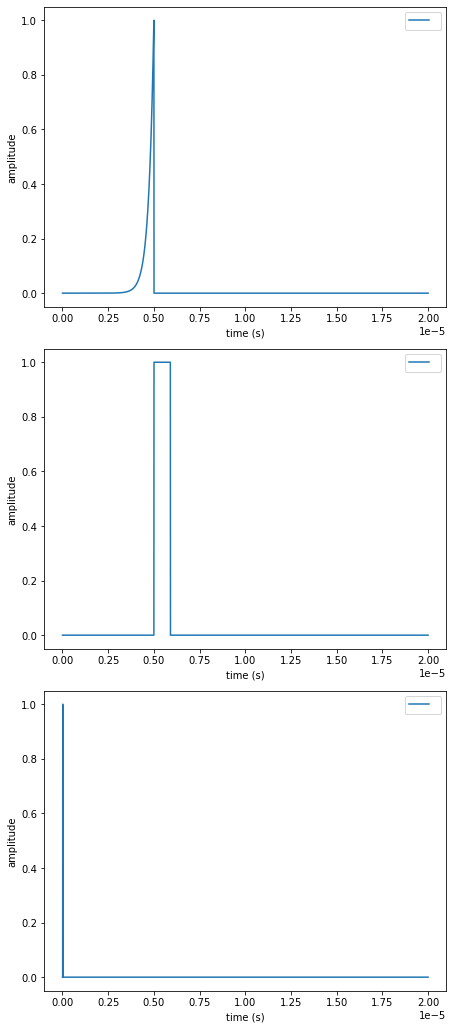

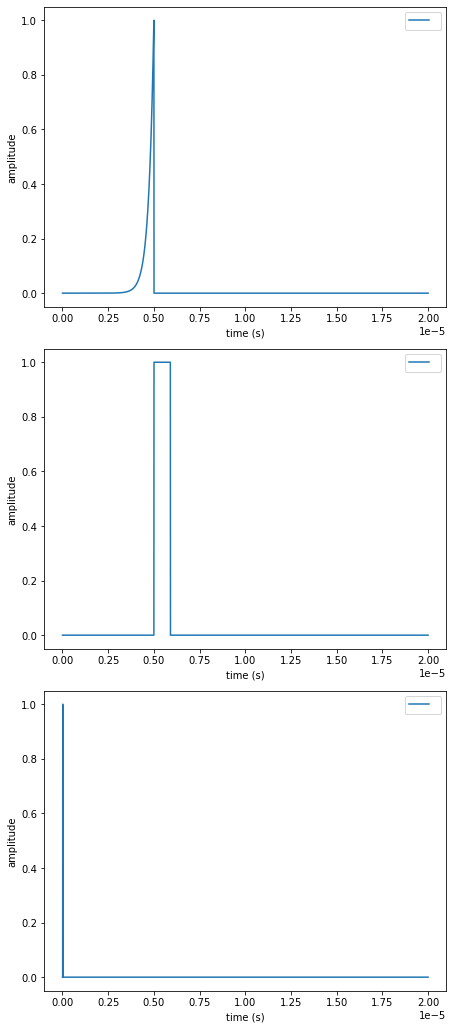

In [5]:
c.plot()

In [6]:
for i in c.y:
    print(i)

[1.75687715e-08 1.76316293e-08 1.76947120e-08 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]


In [7]:
awg.set_wfm(wfm_name= 'rising_test',
            wfm = c.y[0],
            mkr1= marker.y
           )

awg.set_wfm(wfm_name= 'square_test',
            wfm = c.y[1],
           )
awg.upload_wfm()

In [8]:
awg.assign_ch(1,'rising_test')
awg.assign_ch(2,'square_test')

In [9]:
print(awg)

AWG5208 @ TCPIP0::192.168.10.42::inst0::INSTR
---
Waveform list: dict_keys(['rising_test', 'square_test'])
Sequence list: dict_keys([])
AWG Error state: 0,"No error"
